In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [4]:
cols = ['frame', 'frame index', 'forward', 'head position x', 'head position y', 'eye', 'gaze position x', 'gaze position y']
p1v1 = pd.read_csv('C:/Users/arshk/MLAI/Research Project/Baidu/Gaze_txt_files/p001/179._2017-10-13-10-27_ori_0.txt', sep=",", header = None, names = cols)

In [5]:
def angle_transformations(df):
    df['head theta'] = df['head position x']*360
    df['head phi'] = df['head position y']*180
    
    
    df['eye theta'] = df['gaze position x']*360
    df['eye phi'] = df['gaze position y']*180

In [6]:
angle_transformations(p1v1)

In [7]:
p1v1

,frame,frame index,forward,head position x,head position y,eye,gaze position x,gaze position y,head theta,head phi,eye theta,eye phi
0,frame,1,forward,0.500627,0.527950,eye,0.495522,0.436755,180.225576,95.030982,178.387992,78.615846
1,frame,2,forward,0.501349,0.528238,eye,0.496338,0.437171,180.485496,95.082858,178.681716,78.690780
2,frame,3,forward,0.501704,0.528531,eye,0.496785,0.437861,180.613548,95.135508,178.842492,78.814998
3,frame,4,forward,0.501793,0.528431,eye,0.497054,0.437900,180.645408,95.117616,178.939332,78.822036
4,frame,5,forward,0.502112,0.528415,eye,0.497443,0.438079,180.760212,95.114628,179.079516,78.854274
...,...,...,...,...,...,...,...,...,...,...,...,...
1474,frame,1475,forward,0.636678,0.578426,eye,0.623715,0.494168,229.204188,104.116734,224.537400,88.950276
1475,frame,1476,forward,0.636233,0.579449,eye,0.623237,0.495560,229.043880,104.300802,224.365176,89.200782
1476,frame,1477,forward,0.635597,0.580375,eye,0.622583,0.496684,228.814776,104.467554,224.129952,89.403174
1477,frame,1478,forward,0.634922,0.581205,eye,0.621824,0.497603,228.571740,104.616846,223.856568,89.568468


In [8]:
def angular_speed(df):
    ang_speed = []
    vel_x = []
    vel_y = []
    for i in range(1, len(df)):
        ang_distance = np.sqrt((df['eye theta'][i]-df['eye theta'][i-1])**2 + (df['eye phi'][i]-df['eye phi'][i-1])**2)
        # time is constant in every jump
        ang_speed.append(ang_distance)
        
        dist_x = (df['eye theta'][i]-df['eye theta'][i-1])
        vel_x.append(dist_x)
        
        dist_y = (df['eye phi'][i]-df['eye phi'][i-1])
        vel_y.append(dist_y)
    return vel_x, vel_y,ang_speed

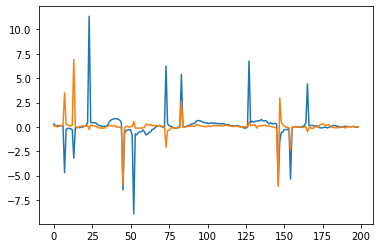

In [9]:
angVel_x, angVel_y, angSpd = angular_speed(p1v1[:200])
plt.plot(angVel_x)
plt.plot(angVel_y)

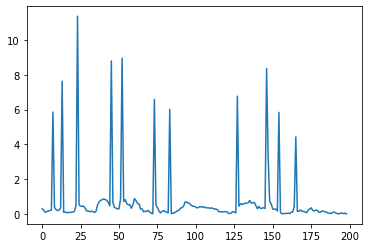

In [10]:
plt.plot(angSpd)

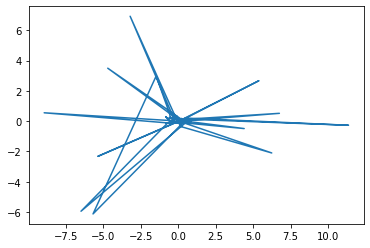

In [11]:
plt.plot(angVel_x, angVel_y)

In [12]:
def rolling_vel(df):
    roll_speed = []
    vel_x = []
    vel_y = []
    for i in range(2, len(df)-2):
        distance = np.sqrt((df['eye theta'][i+2]+df['eye theta'][i+1]-df['eye theta'][i-1]-df['eye theta'][i-2])**2 + (df['eye phi'][i+2]+df['eye phi'][i+1]-df['eye phi'][i-1]-df['eye phi'][i-2])**2)
        roll_speed.append(distance/6)
        
        dist_x = (df['eye theta'][i+2]+df['eye theta'][i+1]-df['eye theta'][i-1]-df['eye theta'][i-2])
        vel_x.append(dist_x/6)
        
        dist_y = (df['eye phi'][i+2]+df['eye phi'][i+1]-df['eye phi'][i-1]-df['eye phi'][i-2])
        vel_y.append(dist_y/6)
    return vel_x, vel_y,roll_speed

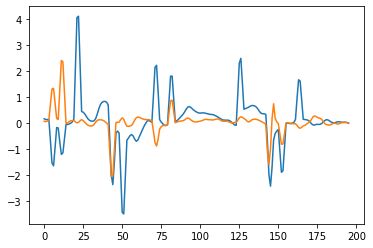

In [13]:
rolling_angVel_x, rolling_angVel_y, rolling_angSpd = rolling_vel(p1v1[:200])
plt.plot(rolling_angVel_x)
plt.plot(rolling_angVel_y)

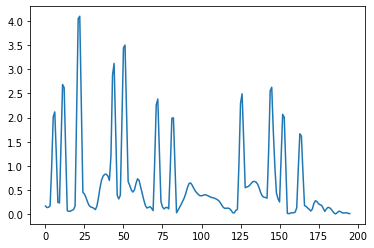

In [14]:
plt.plot(rolling_angSpd)

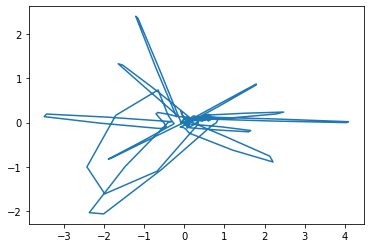

In [15]:
plt.plot(rolling_angVel_x, rolling_angVel_y)

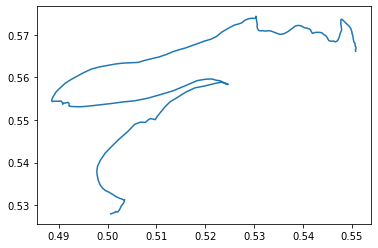

In [16]:
plt.plot(p1v1[:200]['head position x'], p1v1[:200]['head position y'])

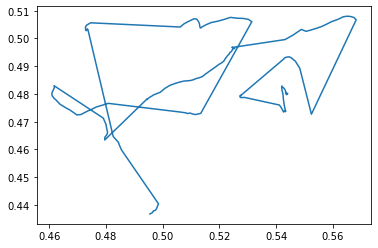

In [17]:
plt.plot(p1v1[:200]['gaze position x'], p1v1[:200]['gaze position y'])

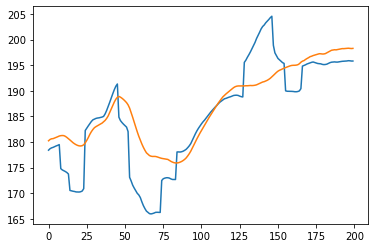

In [18]:
plt.plot(p1v1[:200]['eye theta'])
plt.plot(p1v1[:200]['head theta'])

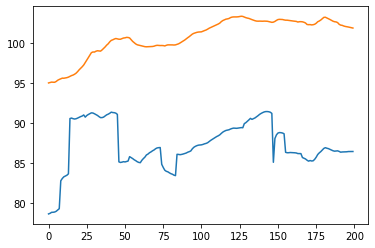

In [19]:
plt.plot(p1v1[:200]['eye phi'])
plt.plot(p1v1[:200]['head phi'])

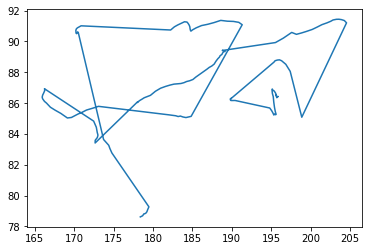

In [20]:
plt.plot(p1v1[:200]['eye theta'], p1v1[:200]['eye phi'])

In [21]:
(p1v1['head position y']==0.50).value_counts()

False    1479
Name: head position y, dtype: int64

In [22]:
def shifting_theta(df):
    shifted_x = []
    for i in range(0, len(df)):
        h = df['head theta'][i]
        e = df['eye theta'][i]
        if h>=180 and e>=180:
            shifted_x.append(180 + abs(180-h) + abs(180-e))
        if h<=180 and e<=180:
            shifted_x.append(180 - abs(180-h) - abs(180-e))
        if h>=180 and e<=180:
            shifted_x.append(180 + abs(180-h) - abs(180-e))
        if h<=180 and e>=180:
            shifted_x.append(180 - abs(180-h) + abs(180-e))
    return shifted_x

def shifting_phi(df):
    shifted_y = []
    for i in range(0, len(df)):
        h = df['head phi'][i]
        e = df['eye phi'][i]
        if h>=90 and e>=90:
            shifted_y.append(90+ abs(90-h) + abs(90-e))
        if h<=90 and e<=90:
            shifted_y.append(90 - abs(90-h) - abs(90-e))
        if h>=90 and e<=90:
            shifted_y.append(90 + abs(90-h) - abs(90-e))
        if h<=90 and e>=90:
            shifted_y.append(90 - abs(90-h) + abs(90-e))
    return shifted_y

In [23]:
sx = shifting_theta(p1v1)
sy = shifting_phi(p1v1)

p1v1['shifted theta'] = sx
p1v1['shifted phi'] = sy

In [24]:
p1v1

,frame,frame index,forward,head position x,head position y,eye,gaze position x,gaze position y,head theta,head phi,eye theta,eye phi,shifted theta,shifted phi
0,frame,1,forward,0.500627,0.527950,eye,0.495522,0.436755,180.225576,95.030982,178.387992,78.615846,178.613568,83.646828
1,frame,2,forward,0.501349,0.528238,eye,0.496338,0.437171,180.485496,95.082858,178.681716,78.690780,179.167212,83.773638
2,frame,3,forward,0.501704,0.528531,eye,0.496785,0.437861,180.613548,95.135508,178.842492,78.814998,179.456040,83.950506
3,frame,4,forward,0.501793,0.528431,eye,0.497054,0.437900,180.645408,95.117616,178.939332,78.822036,179.584740,83.939652
4,frame,5,forward,0.502112,0.528415,eye,0.497443,0.438079,180.760212,95.114628,179.079516,78.854274,179.839728,83.968902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,frame,1475,forward,0.636678,0.578426,eye,0.623715,0.494168,229.204188,104.116734,224.537400,88.950276,273.741588,103.067010
1475,frame,1476,forward,0.636233,0.579449,eye,0.623237,0.495560,229.043880,104.300802,224.365176,89.200782,273.409056,103.501584
1476,frame,1477,forward,0.635597,0.580375,eye,0.622583,0.496684,228.814776,104.467554,224.129952,89.403174,272.944728,103.870728
1477,frame,1478,forward,0.634922,0.581205,eye,0.621824,0.497603,228.571740,104.616846,223.856568,89.568468,272.428308,104.185314


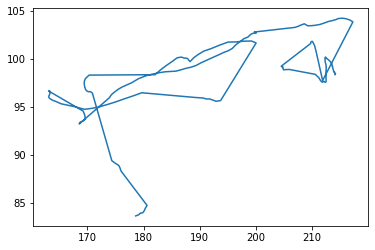

In [25]:
plt.plot(p1v1[:200]['shifted theta'], p1v1[:200]['shifted phi'])

In [26]:
p1v1.iloc[0]["eye"]

'eye'

In [27]:
def Rx(theta):
    return np.array([[ 1, 0           , 0           ],
                   [ 0, math.cos(theta),-math.sin(theta)],
                   [ 0, math.sin(theta), math.cos(theta)]])
  
def Ry(theta):
    return np.array([[ math.cos(theta), 0, math.sin(theta)],
                   [ 0           , 1, 0           ],
                   [-math.sin(theta), 0, math.cos(theta)]])
  
def Rz(theta):
    return np.array([[ math.cos(theta), -math.sin(theta), 0 ],
                   [ math.sin(theta), math.cos(theta) , 0 ],
                   [ 0           , 0            , 1 ]])

# def eye_2_world(theta_eye, phi_eye, theta_head, phi_head):
#     theta_e = theta_eye*(np.pi/180)
#     phi_e = phi_eye*(np.pi/180)
#     e_R_h = Ry(phi_e)@Rz(theta_e)

#     theta_h = theta_head*(np.pi/180)
#     phi_h = phi_head*(np.pi/180)
#     h_R_w = Ry(phi_h)@Rz(theta_h)

#     return h_R_w@e_R_h, e_R_h@h_R_w

def eye_2_head(theta_eye, phi_eye, theta_head, phi_head):
    theta_e = theta_eye*(np.pi/180)
    phi_e = phi_eye*(np.pi/180)
    e_R_w = Ry(phi_e)@Rz(theta_e)

    theta_h = theta_head*(np.pi/180)
    phi_h = phi_head*(np.pi/180)
    h_R_w = Ry(phi_h)@Rz(theta_h)
    
    w_R_h = np.linalg.inv(h_R_w)

    return e_R_w@w_R_h

def get_eye_in_head(theta_eye, phi_eye, theta_head, phi_head):
    e_R_h = eye_2_head(theta_eye, phi_eye, theta_head, phi_head)
    
    X_x = e_R_h[0][0]
    X_y = e_R_h[1][0]
    X_z = e_R_h[2][0]

    theta_eye_in_head = math.degrees(math.atan(X_y/X_x))
    phi_eye_in_head = math.degrees(math.atan(X_z/(np.sqrt(X_x**2 + X_y**2))))
    
    return theta_eye_in_head, phi_eye_in_head

In [28]:
e_R_h = eye_2_head(p1v1.loc[0]["eye theta"], p1v1.loc[0]["eye phi"], p1v1.loc[0]["head theta"], p1v1.loc[0]["head phi"])

X_x = e_R_h[0][0]
X_y = e_R_h[1][0]
X_z = e_R_h[2][0]

theta_eye_in_head = math.degrees(math.atan(X_y/X_x))
phi_eye_in_head = math.degrees(math.atan(X_z/(np.sqrt(X_x**2 + X_y**2))))

e_R_h

array([[ 0.95924826,  0.00632946, -0.28249376],
       [ 0.00281204,  0.99948574,  0.03194285],
       [ 0.28255066, -0.03143551,  0.95873715]])

In [29]:
p1v1

,frame,frame index,forward,head position x,head position y,eye,gaze position x,gaze position y,head theta,head phi,eye theta,eye phi,shifted theta,shifted phi
0,frame,1,forward,0.500627,0.527950,eye,0.495522,0.436755,180.225576,95.030982,178.387992,78.615846,178.613568,83.646828
1,frame,2,forward,0.501349,0.528238,eye,0.496338,0.437171,180.485496,95.082858,178.681716,78.690780,179.167212,83.773638
2,frame,3,forward,0.501704,0.528531,eye,0.496785,0.437861,180.613548,95.135508,178.842492,78.814998,179.456040,83.950506
3,frame,4,forward,0.501793,0.528431,eye,0.497054,0.437900,180.645408,95.117616,178.939332,78.822036,179.584740,83.939652
4,frame,5,forward,0.502112,0.528415,eye,0.497443,0.438079,180.760212,95.114628,179.079516,78.854274,179.839728,83.968902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,frame,1475,forward,0.636678,0.578426,eye,0.623715,0.494168,229.204188,104.116734,224.537400,88.950276,273.741588,103.067010
1475,frame,1476,forward,0.636233,0.579449,eye,0.623237,0.495560,229.043880,104.300802,224.365176,89.200782,273.409056,103.501584
1476,frame,1477,forward,0.635597,0.580375,eye,0.622583,0.496684,228.814776,104.467554,224.129952,89.403174,272.944728,103.870728
1477,frame,1478,forward,0.634922,0.581205,eye,0.621824,0.497603,228.571740,104.616846,223.856568,89.568468,272.428308,104.185314


In [30]:
# Testing 

#TEST 1

#Assumptions
theta_h_w = 180*(np.pi/180)
phi_h_w = 90*(np.pi/180)
theta_e_w = 180*(np.pi/180)
phi_e_w = 90*(np.pi/180)

theta_e_h, phi_e_h = get_eye_in_head(theta_e_w, phi_e_w, theta_h_w, phi_h_w)

print(theta_e_h*(180/np.pi))
print(phi_e_h*(180/np.pi))

# Should output 0 or ~0 angle

-5.654881336255665e-15
-5.465929216083614e-15


In [31]:
# Testing 

#TEST 2

#Assumptions
theta_h_w = 270*(np.pi/180)
phi_h_w = 90*(np.pi/180)
theta_e_w = 180*(np.pi/180)
phi_e_w = 90*(np.pi/180)

theta_e_h, phi_e_h = get_eye_in_head(theta_e_w, phi_e_w, theta_h_w, phi_h_w)

print(theta_e_h*(180/np.pi))
print(phi_e_h*(180/np.pi))

# Theta should be -90 degrees and phi should be 0

-89.9661710510463
0.03380353857687879


In [32]:
# Testing 

#TEST 3

#Assumptions
theta_h_w = 180*(np.pi/180)
phi_h_w = 180*(np.pi/180)
theta_e_w = 180*(np.pi/180)
phi_e_w = 90*(np.pi/180)

theta_e_h, phi_e_h = get_eye_in_head(theta_e_w, phi_e_w, theta_h_w, phi_h_w)

print(theta_e_h*(180/np.pi))
print(phi_e_h*(180/np.pi))

# Theta should be 0 degrees and phi should be 90 degrees

2.462146901041713e-14
90.00000000000001


In [33]:
theta_e_h = []
phi_e_h = []
for i in range(0, len(p1v1)):
    e_R_h_i = eye_2_head(p1v1.loc[i]["eye theta"], p1v1.loc[i]["eye phi"], p1v1.loc[i]["head theta"], p1v1.loc[i]["head phi"])
#     coord_eye = np.array([0, p1v1.loc[i]["gaze position x"], p1v1.loc[i]["gaze position y"]])
    
    X_x = e_R_h_i[0][0]
    X_y = e_R_h_i[1][0]
    X_z = e_R_h_i[2][0]
    
#     phi_eye_in_head = math.degrees(math.asin(X_z))
#     theta_eye_in_head = math.degrees(math.acos(X_x/math.cos(math.asin(X_z))))
    
    theta_eye_in_head = math.degrees(math.atan(X_y/X_x))
    phi_eye_in_head = math.degrees(math.atan(X_z/(np.sqrt(X_x**2 + X_y**2))))
    
    theta_e_h.append(theta_eye_in_head)
    phi_e_h.append(phi_eye_in_head)
    
p1v1["theta eye_in_head"] = theta_e_h
p1v1["phi eye_in_head"] = phi_e_h

In [34]:
math.atan(1)

0.7853981633974483

In [35]:
p1v1["theta eye_in_head"].describe()

count    1479.000000
mean        0.682868
std         1.456059
min        -2.627954
25%        -0.288192
50%         0.544069
75%         1.657290
max         5.319098
Name: theta eye_in_head, dtype: float64

In [36]:
p1v1["phi eye_in_head"].describe()

count    1479.000000
mean       14.508178
std         3.975611
min       -14.381243
25%        12.557465
50%        14.210012
75%        16.430194
max        28.152118
Name: phi eye_in_head, dtype: float64

In [37]:
def new_angular_speed(df):
    ang_speed = []
    vel_x = []
    vel_y = []
    for i in range(1, len(df)):
        ang_distance = np.sqrt((df['theta eye_in_head'][i]-df['theta eye_in_head'][i-1])**2 + (df['phi eye_in_head'][i]-df['phi eye_in_head'][i-1])**2)
        # time is constant in every jump
        ang_speed.append(ang_distance)
        
        dist_x = (df['theta eye_in_head'][i]-df['theta eye_in_head'][i-1])
        vel_x.append(dist_x)
        
        dist_y = (df['phi eye_in_head'][i]-df['phi eye_in_head'][i-1])
        vel_y.append(dist_y)
    return vel_x, vel_y,ang_speed

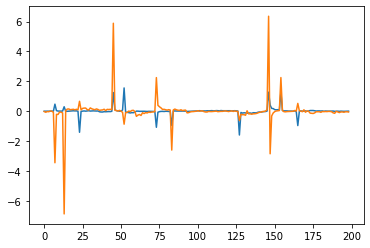

In [38]:
angVel_x, angVel_y, angSpd = new_angular_speed(p1v1[:200])
plt.plot(angVel_x)
plt.plot(angVel_y)

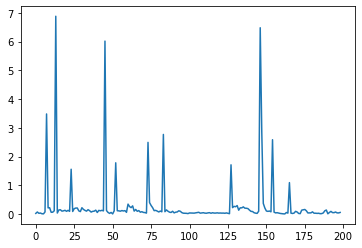

In [39]:
plt.plot(angSpd)

In [40]:
def new_rolling_vel(df):
    roll_speed = []
    vel_x = []
    vel_y = []
    for i in range(2, len(df)-2):
        distance = np.sqrt((df['theta eye_in_head'][i+2]+df['theta eye_in_head'][i+1]-df['theta eye_in_head'][i-1]-df['theta eye_in_head'][i-2])**2 + (df['phi eye_in_head'][i+2]+df['phi eye_in_head'][i+1]-df['phi eye_in_head'][i-1]-df['phi eye_in_head'][i-2])**2)
        roll_speed.append(distance/6)
        
        dist_x = (df['theta eye_in_head'][i+2]+df['theta eye_in_head'][i+1]-df['theta eye_in_head'][i-1]-df['theta eye_in_head'][i-2])
        vel_x.append(dist_x/6)
        
        dist_y = (df['phi eye_in_head'][i+2]+df['phi eye_in_head'][i+1]-df['phi eye_in_head'][i-1]-df['phi eye_in_head'][i-2])
        vel_y.append(dist_y/6)
    return vel_x, vel_y,roll_speed

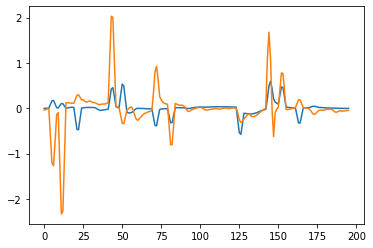

In [41]:
rolling_angVel_x, rolling_angVel_y, rolling_angSpd = new_rolling_vel(p1v1[:200])
plt.plot(rolling_angVel_x)
plt.plot(rolling_angVel_y)

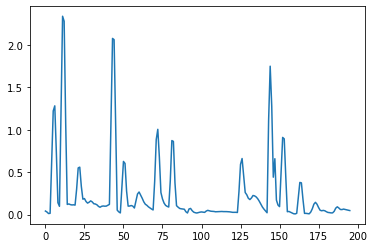

In [42]:
plt.plot(rolling_angSpd)

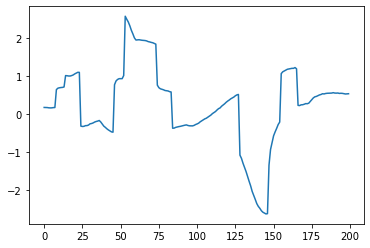

In [43]:
plt.plot(p1v1[:200]['theta eye_in_head'])

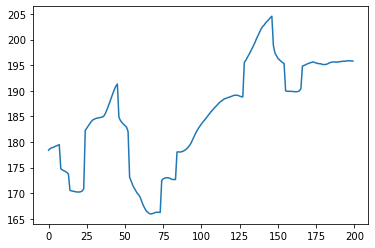

In [44]:
plt.plot(p1v1[:200]['eye theta'])

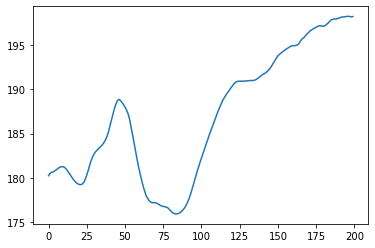

In [45]:
plt.plot(p1v1[:200]['head theta'])

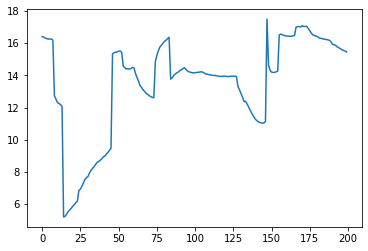

In [46]:
plt.plot(p1v1[:200]['phi eye_in_head'])

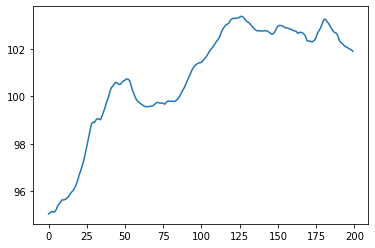

In [47]:
plt.plot(p1v1[:200]['head phi'])

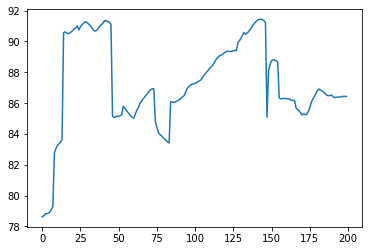

In [48]:
plt.plot(p1v1[:200]['eye phi'])

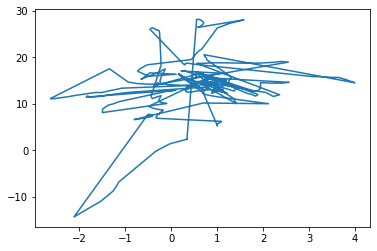

In [49]:
plt.plot(p1v1[:500]['theta eye_in_head'], p1v1[:500]['phi eye_in_head'])

## Videos watched by how many people

In [50]:
import os
import posixpath 

In [51]:
'C:/Users/arshk/MLAI/Research Project/Baidu/Gaze_txt_files/p001/179._2017-10-13-10-27_ori_0.txt'

'C:/Users/arshk/MLAI/Research Project/Baidu/Gaze_txt_files/p001/179._2017-10-13-10-27_ori_0.txt'

In [52]:
path = 'C:/Users/arshk/MLAI/Research Project/Baidu/Gaze_txt_files'
video_count = [0]*216
for i in os.listdir(path):
    x = i.split()
    if x[0][0] == 'p':
        new_path = posixpath.join(path, i, "")
        for j in os.listdir(new_path):
            n = j.split()
            print(n[0][:3])
            video_count[int(n[0][:3])] += 1

179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
208
209
210
211
212
213
214
215
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
208
209
210
211
212
213
214
215
004
005
006
011
012
013
014
015
018
019
021
024
025
026
028
029
030
031
034
035
037
038
040
041
042
043
044
045
047
048
049
050
051
054
056
057
058
059
060
064
065
066
067
068
069
070
071
072
073
074
075
079
080
081
087
088
090
094
096
097
098
099
100
101
102
103
106
109
110
111
112
113
115
119
120
121
122
123
124
126
130
131
134
136
137
138
139
140
141
142
143
144
145
149
150
151
152
153
154
155
156
157
158
160
161
162
163
164
165
166
167
169
171
172
173
174
175
178
180
181
182
183
184
186
187
188
189
190
191
192
193
194
195
197
198
199
201
202
203
206
208
210
211
212
213
214
215
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031


196
197
198
199
200
201
202
203
204
205
206
208
209
210
211
212
213
214
215
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
058
059
060
062
063
064
065
066
067
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
085
087
088
089
090
091
092
093
094
095
096
097
098
099
100
101
102
103
104
105
106
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
208
209
210
211
212
213
214
215
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023


001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
037
038
039
040
041
042
043
044
045
046
047
048
049
050
051
052
053
054
055
056
057
058
059
060
062
063
064
065
066
067
068
069
070
071
072
073
074
075
076
077
078
079
080
081
082
083
085
087
088
089
091
092
093
094
095
096
097
098
099
100
101
102
103
104
105
106
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
208
209
210
211
212
213
214
215
001
002
003
004
005
006
007
008
009
010
011
012
013
014
015
016
017
018
019
020
021
022
023
024
025
026
027
028
029
030
031
032
033
034
035
037
038
039
040
041
042
043
044
045


In [53]:
video_count

[0,
 31,
 32,
 31,
 33,
 33,
 33,
 31,
 32,
 32,
 32,
 33,
 32,
 32,
 33,
 33,
 32,
 31,
 32,
 33,
 32,
 33,
 31,
 31,
 33,
 32,
 33,
 32,
 33,
 33,
 33,
 33,
 32,
 32,
 33,
 29,
 0,
 30,
 30,
 28,
 29,
 30,
 29,
 30,
 29,
 30,
 29,
 30,
 30,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 29,
 30,
 29,
 29,
 0,
 28,
 28,
 29,
 29,
 28,
 30,
 29,
 30,
 29,
 30,
 32,
 34,
 31,
 34,
 32,
 32,
 31,
 33,
 33,
 34,
 33,
 33,
 0,
 32,
 0,
 34,
 34,
 33,
 33,
 32,
 33,
 33,
 33,
 32,
 33,
 34,
 33,
 34,
 34,
 34,
 33,
 33,
 33,
 33,
 32,
 0,
 0,
 33,
 33,
 33,
 34,
 34,
 33,
 34,
 33,
 32,
 32,
 33,
 34,
 34,
 33,
 33,
 34,
 33,
 32,
 33,
 33,
 33,
 34,
 34,
 32,
 33,
 33,
 33,
 34,
 33,
 34,
 33,
 33,
 34,
 33,
 33,
 31,
 31,
 31,
 31,
 31,
 32,
 32,
 31,
 32,
 32,
 32,
 32,
 31,
 32,
 31,
 31,
 32,
 31,
 32,
 32,
 31,
 32,
 32,
 31,
 31,
 32,
 31,
 32,
 32,
 31,
 32,
 32,
 31,
 31,
 31,
 29,
 31,
 31,
 31,
 31,
 29,
 29,
 29,
 31,
 30,
 31,
 31,
 31,
 30,
 31,
 31,
 30,
 29,
 29,
 29,
 29,
 28,
 2

(array([  8.,   0.,   0.,   0.,   0.,   0.,   0.,   6.,  55., 147.]),
 array([ 0. ,  3.4,  6.8, 10.2, 13.6, 17. , 20.4, 23.8, 27.2, 30.6, 34. ]),
 <a list of 10 Patch objects>)

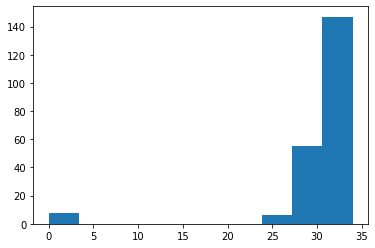

In [54]:
import matplotlib.pyplot as plt
plt.hist(video_count)

## Rough for checking Saccades, Microsaccades, Fixations

In [55]:
p1v1

,frame,frame index,forward,head position x,head position y,eye,gaze position x,gaze position y,head theta,head phi,eye theta,eye phi,shifted theta,shifted phi,theta eye_in_head,phi eye_in_head
0,frame,1,forward,0.500627,0.527950,eye,0.495522,0.436755,180.225576,95.030982,178.387992,78.615846,178.613568,83.646828,0.167963,16.412495
1,frame,2,forward,0.501349,0.528238,eye,0.496338,0.437171,180.485496,95.082858,178.681716,78.690780,179.167212,83.773638,0.166550,16.389507
2,frame,3,forward,0.501704,0.528531,eye,0.496785,0.437861,180.613548,95.135508,178.842492,78.814998,179.456040,83.950506,0.165158,16.318006
3,frame,4,forward,0.501793,0.528431,eye,0.497054,0.437900,180.645408,95.117616,178.939332,78.822036,179.584740,83.939652,0.158527,16.293264
4,frame,5,forward,0.502112,0.528415,eye,0.497443,0.438079,180.760212,95.114628,179.079516,78.854274,179.839728,83.968902,0.156051,16.258108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,frame,1475,forward,0.636678,0.578426,eye,0.623715,0.494168,229.204188,104.116734,224.537400,88.950276,273.741588,103.067010,1.177809,15.118471
1475,frame,1476,forward,0.636233,0.579449,eye,0.623237,0.495560,229.043880,104.300802,224.365176,89.200782,273.409056,103.501584,1.195511,15.051184
1476,frame,1477,forward,0.635597,0.580375,eye,0.622583,0.496684,228.814776,104.467554,224.129952,89.403174,272.944728,103.870728,1.210530,15.014863
1477,frame,1478,forward,0.634922,0.581205,eye,0.621824,0.497603,228.571740,104.616846,223.856568,89.568468,272.428308,104.185314,1.230558,14.997714


In [56]:
cg = np.stack((np.array(p1v1[:100]["frame index"]), np.array(p1v1[:100]["frame index"]), np.array(p1v1[:100]["frame index"])), axis = 1)

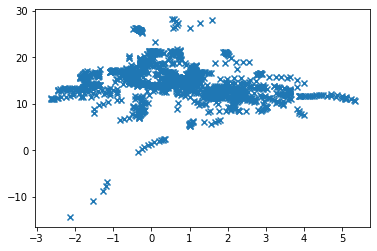

In [57]:
plt.scatter(p1v1[:]['theta eye_in_head'], p1v1[:]['phi eye_in_head'], marker = 'x')

In [58]:
from colour import Color
red = Color("red")
colors = list(red.range_to(Color("green"),1437))

colors

# plt.scatter(p1v1[:]['theta eye_in_head'], p1v1[:]['phi eye_in_head'], marker = 'x', c = colors)

[<Color red>,
 <Color red>,
 <Color #ff0100>,
 <Color #ff0100>,
 <Color #ff0100>,
 <Color #ff0200>,
 <Color #fe0200>,
 <Color #fe0200>,
 <Color #fe0300>,
 <Color #fe0300>,
 <Color #fe0400>,
 <Color #fe0400>,
 <Color #fe0400>,
 <Color #fe0500>,
 <Color #fe0500>,
 <Color #fe0500>,
 <Color #fe0600>,
 <Color #fd0600>,
 <Color #fd0600>,
 <Color #fd0700>,
 <Color #fd0700>,
 <Color #fd0700>,
 <Color #fd0800>,
 <Color #fd0800>,
 <Color #fd0800>,
 <Color #fd0900>,
 <Color #fd0900>,
 <Color #fd0900>,
 <Color #fd0a00>,
 <Color #fc0a00>,
 <Color #fc0b00>,
 <Color #fc0b00>,
 <Color #fc0b00>,
 <Color #fc0c00>,
 <Color #fc0c00>,
 <Color #fc0c00>,
 <Color #fc0d00>,
 <Color #fc0d00>,
 <Color #fc0d00>,
 <Color #fc0e00>,
 <Color #fb0e00>,
 <Color #fb0e00>,
 <Color #fb0f00>,
 <Color #fb0f00>,
 <Color #fb0f00>,
 <Color #fb1000>,
 <Color #fb1000>,
 <Color #fb1000>,
 <Color #fb1100>,
 <Color #fb1100>,
 <Color #fb1100>,
 <Color #fa1200>,
 <Color #fa1200>,
 <Color #fa1200>,
 <Color #fa1300>,
 <Color #fa1300>,


In [59]:
vel_x, vel_y, spd = new_angular_speed(p1v1)

In [60]:
to = 180 - 182.23437599999997
po = 90.74586599999999 - 90
tn = 180 - 170.87443199999998
pn = 91.01764800000001 - 90

v1 = [math.cos(pn*(math.pi/180))*math.cos(tn*(math.pi/180)), math.cos(pn*(math.pi/180))*math.sin(tn*(math.pi/180)), math.sin(pn*(math.pi/180))]
v2 = [math.cos(po*(math.pi/180))*math.cos(to*(math.pi/180)), math.cos(po*(math.pi/180))*math.sin(to*(math.pi/180)), math.sin(po*(math.pi/180))]

print(v1)
print(v2)

dotPro = np.dot(v1, v2)
mag_v1 = math.sqrt(sum(pow(element, 2) for element in v1))
mag_v2 = math.sqrt(sum(pow(element, 2) for element in v2))
# time is constant in every jump

disp = (math.degrees(math.acos(dotPro))/(mag_v1*mag_v2))
print(disp)

[0.9871873995209777, 0.1585736653048981, 0.01776037439863497]
[0.9991550386888178, -0.038984030874915226, 0.013017449807487187]
11.361834763274777


In [61]:
def angular_disp(theta_new, phi_new, theta_old, phi_old):
    tn = 180 - theta_new
    to = 180 - theta_old
    pn = phi_new - 90
    po = phi_old - 90
    
    v1 = [math.cos(pn*(math.pi/180))*math.cos(tn*(math.pi/180)), math.cos(pn*(math.pi/180))*math.sin(tn*(math.pi/180)), math.sin(pn*(math.pi/180))]
    v2 = [math.cos(po*(math.pi/180))*math.cos(to*(math.pi/180)), math.cos(po*(math.pi/180))*math.sin(to*(math.pi/180)), math.sin(po*(math.pi/180))]

    dotPro = np.dot(v1, v2)
    mag_v1 = math.sqrt(sum(pow(element, 2) for element in v1))
    mag_v2 = math.sqrt(sum(pow(element, 2) for element in v2))
    # time is constant in every jump

    ang_disp = (math.degrees(math.acos(dotPro))/(mag_v1*mag_v2))
    
    return ang_disp

In [62]:
angular_disp(170.87443199999998, 91.01764800000001, 182.23437599999997, 90.74586599999999)

11.361834763274777

In [63]:
# Function for Angular Velocity & Acceleration
def angular_metrics_e_w(df):
    ang_vel = []
    ang_disp = []
    for i in range(1, len(df)):
        
        print(i)
        
        print(df['eye theta'][i])
        print(df['eye phi'][i])
        print(df['eye theta'][i-1])
        print(df['eye phi'][i-1])
        
        disp = angular_disp(df['eye theta'][i], df['eye phi'][i], df['eye theta'][i-1], df['eye phi'][i-1])
        print(disp)
        print("---------")
        
        disp = abs(disp)
        ang_disp.append(disp)
        ang_vel.append(disp*25)
          
    ang_acc = np.diff(ang_vel)
    #Taking absolute value
    ang_accel = np.array([abs(ele) for ele in ang_acc])
    
    ang_accel = ang_accel*25
    ang_vel = np.array(ang_vel)
    
    return ang_disp, ang_vel, ang_accel

1
178.681716
78.69077999999999
178.387992
78.615846
0.2975723960324308
---------
2
178.842492
78.814998
178.681716
78.69077999999999
0.20073790096018831
---------
3
178.939332
78.822036
178.842492
78.814998
0.09526211150207617
---------
4
179.07951599999998
78.85427399999999
178.939332
78.822036
0.14126013801006096
---------
5
179.2188
78.94479600000001
179.07951599999998
78.85427399999999
0.16393640363175394
---------
6
179.330184
79.098876
179.2188
78.94479600000001
0.18893678915781692
---------
7
179.47868400000002
79.269948
179.330184
79.098876
0.22481405176988703
---------
8
174.7818
82.76630399999999
179.47868400000002
79.269948
5.808617731147485
---------
9
174.527388
83.057616
174.7818
82.76630399999999
0.3854899238887616
---------
10
174.38119200000003
83.26413
174.527388
83.057616
0.25242463102096696
---------
11
174.21534
83.357622
174.38119200000003
83.26413
0.18940543055196582
---------
12
174.017088
83.46331799999999
174.21534
83.357622
0.2235126423031989
---------
13
173

---------
179
195.147396
86.61844799999999
195.253344
86.42583
0.21973928698502407
---------
180
195.103872
86.826222
195.147396
86.61844799999999
0.21226911937114312
---------
181
195.12752400000002
86.916978
195.103872
86.826222
0.0937784752152835
---------
182
195.19577999999998
86.846598
195.12752400000002
86.916978
0.09797162835324269
---------
183
195.3504
86.79636
195.19577999999998
86.846598
0.16235054325274506
---------
184
195.48414
86.704254
195.3504
86.79636
0.1622110404443764
---------
185
195.575256
86.62284
195.48414
86.704254
0.12207474323057015
---------
186
195.61402800000005
86.52941999999999
195.575256
86.62284
0.10111974224899135
---------
187
195.63368400000002
86.47975799999999
195.61402800000005
86.52941999999999
0.053396969917329486
---------
188
195.597576
86.49486
195.63368400000002
86.47975799999999
0.03907638269378352
---------
189
195.59739599999997
86.519628
195.597576
86.49486
0.024768651618245693
---------
190
195.65884800000003
86.44917600000001
195.59

92.093148
115.68045599999999
0.3936359884479383
---------
456
92.65514399999999
89.15146200000001
92.48741999999999
115.511598
26.360634927868055
---------
457
92.95732799999999
88.480512
92.65514399999999
89.15146200000001
0.7358322079528846
---------
458
93.24593999999999
87.84206999999999
92.95732799999999
88.480512
0.7005843667129139
---------
459
93.48425999999999
87.09075
93.24593999999999
87.84206999999999
0.7881410802309294
---------
460
93.65018399999998
85.929444
93.48425999999999
87.09075
1.1730555976387254
---------
461
93.6531
84.502044
93.65018399999998
85.929444
1.4274029576332012
---------
462
93.45358800000001
82.417878
93.6531
84.502044
2.0935692187214325
---------
463
89.84671200000001
78.274602
93.45358800000001
82.417878
5.459335059493447
---------
464
89.72618399999999
76.562496
89.84671200000001
78.274602
1.7161420345113574
---------
465
89.6481
75.36677399999999
89.72618399999999
76.562496
1.1981190906436214
---------
466
90.180756
78.037398
89.6481
75.366773999

---------
573
259.414344
88.89465600000001
259.792848
88.601256
0.4788320403710713
---------
574
259.024068
89.15112
259.414344
88.89465600000001
0.4669524502846929
---------
575
258.528204
89.200836
259.024068
89.15112
0.4982990237940358
---------
576
257.98032
89.106732
258.528204
89.200836
0.5558479101081076
---------
577
257.47840800000006
88.778538
257.98032
89.106732
0.599616946679238
---------
578
256.961916
88.61515200000001
257.47840800000006
88.778538
0.5415910030203069
---------
579
256.57106400000004
88.577028
256.961916
88.61515200000001
0.3925901411444271
---------
580
256.304376
88.57395
256.57106400000004
88.577028
0.2666233462847989
---------
581
256.02606
88.62892200000002
256.304376
88.57395
0.28361164857635357
---------
582
255.725676
88.67453400000001
256.02606
88.62892200000002
0.3037450273321124
---------
583
255.442356
88.74286200000002
255.725676
88.67453400000001
0.2913728934126793
---------
584
255.11428800000002
88.904124
255.442356
88.74286200000002
0.36549

0.8744197464781199
---------
745
140.53777200000002
86.78826
141.01848
86.704488
0.4871894073956494
---------
746
140.257476
86.80185
140.53777200000002
86.78826
0.28018737315658215
---------
747
140.283252
86.84962200000001
140.257476
86.80185
0.05426351398021161
---------
748
140.547492
86.85396
140.283252
86.84962200000001
0.263876871742905
---------
749
140.996772
86.94531
140.547492
86.85396
0.45782838997120057
---------
750
142.24489200000002
87.19644600000001
140.996772
86.94531
1.271535416907403
---------
751
149.97268799999998
88.47748800000001
142.24489200000002
87.19644600000001
7.827656295851068
---------
752
151.270992
88.759962
149.97268799999998
88.47748800000001
1.3283079175578953
---------
753
152.73298799999998
89.047404
151.270992
88.759962
1.4897208500138432
---------
754
154.20711599999998
89.26216199999999
152.73298799999998
89.047404
1.4895297681864725
---------
755
164.32401599999997
88.381278
154.20711599999998
89.26216199999999
10.152940993812887
---------
756

---------
1012
263.103768
86.498208
262.963188
86.566338
0.15598758635046203
---------
1013
263.268504
86.389812
263.103768
86.498208
0.19693459719672782
---------
1014
263.371032
86.333976
263.268504
86.389812
0.11656467254882782
---------
1015
263.44926
86.328144
263.371032
86.333976
0.07828520311754342
---------
1016
249.34248000000002
86.32258200000001
263.44926
86.328144
14.077631835633646
---------
1017
249.30306
86.17359600000002
249.34248000000002
86.32258200000001
0.15409123880020786
---------
1018
249.327864
86.11286399999999
249.30306
86.17359600000002
0.06558071890545764
---------
1019
249.336036
86.02493399999999
249.327864
86.11286399999999
0.08830714917261734
---------
1020
249.32365199999998
86.033376
249.336036
86.02493399999999
0.01496313405659197
---------
1021
249.32973600000003
86.07537
249.32365199999998
86.033376
0.0424303645179759
---------
1022
249.40483199999997
86.109498
249.32973600000003
86.07537
0.08232824489493627
---------
1023
249.480036
86.190912
249.4

---------
1303
193.561236
88.071012
190.490328
88.03035
3.0693997429625415
---------
1304
196.44991199999996
88.01875799999999
193.561236
88.071012
2.8874667852819664
---------
1305
193.377564
86.68025999999999
196.44991199999996
88.01875799999999
3.3481752796109765
---------
1306
201.987756
87.00444
193.377564
86.68025999999999
8.603193354491829
---------
1307
206.28719999999998
86.69565
201.987756
87.00444
4.304031121280918
---------
1308
208.822284
86.336424
206.28719999999998
86.69565
2.55576529030134
---------
1309
210.73629599999998
85.916106
208.822284
86.336424
1.9553441660717519
---------
1310
212.68328400000004
86.15259
210.73629599999998
85.916106
1.956667827875278
---------
1311
214.026084
86.04225
212.68328400000004
86.15259
1.3442222474777246
---------
1312
215.232732
85.913028
214.026084
86.04225
1.2105918752680167
---------
1313
216.23237999999998
85.912938
215.232732
85.913028
0.9971057933352125
---------
1314
217.410444
85.96925999999999
216.23237999999998
85.912938
1

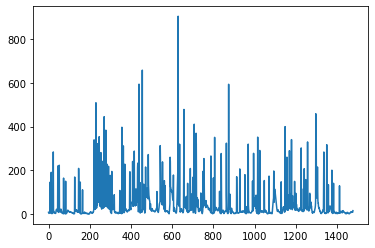

In [64]:
angle, v, acc = angular_metrics_e_w(p1v1)
plt.plot(v)

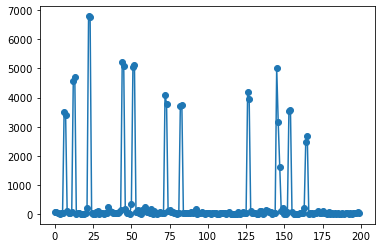

In [65]:
plt.plot(acc[:200], marker = 'o')

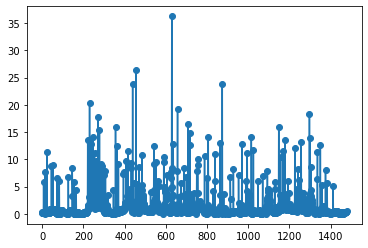

In [66]:
plt.plot(angle[:], marker = 'o')

In [67]:
angle

[0.2975723960324308,
 0.20073790096018831,
 0.09526211150207617,
 0.14126013801006096,
 0.16393640363175394,
 0.18893678915781692,
 0.22481405176988703,
 5.808617731147485,
 0.3854899238887616,
 0.25242463102096696,
 0.18940543055196582,
 0.2235126423031989,
 0.3376151589938215,
 7.628740912488869,
 0.10066274131603911,
 0.10622353935976983,
 0.06789919739237067,
 0.09122859149029924,
 0.08269676738114205,
 0.09956659467162354,
 0.10663284420289544,
 0.15309688171214783,
 0.48936442451447687,
 11.361834763274777,
 0.5146948045096297,
 0.45106121223601003,
 0.43386129968907505,
 0.4459781609881739,
 0.3179388606719817,
 0.17131804620992355,
 0.17611331009169343,
 0.1250033180748599,
 0.1536637564869683,
 0.14057366125657142,
 0.0824023175540779,
 0.14836269205100755,
 0.510811616207879,
 0.6891531541333424,
 0.7815766364770148,
 0.8141237785054353,
 0.865101751358419,
 0.8289043384458997,
 0.7868144616837468,
 0.6744057630573548,
 0.46064472017010405,
 8.790089859116474,
 0.662074163079

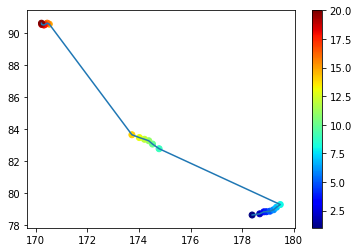

In [68]:
m = 0
n = 20

plt.plot(p1v1[m:n]['eye theta'], p1v1[m:n]['eye phi'])
pts = plt.scatter(p1v1[m:n]['eye theta'], p1v1[m:n]['eye phi'], marker = 'o', cmap = "jet", c = p1v1[m:n]["frame index"])

plt.colorbar(pts)

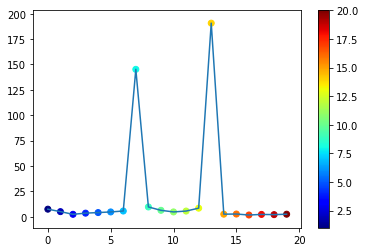

In [69]:
plt.plot(np.linspace(m, n-1, n-m), v[m:n])
pts = plt.scatter(y = v[m:n], x = np.linspace(m, n-1, n-m), marker = 'o', cmap = "jet", c = p1v1[m:n]["frame index"])
# plt.ylim(0, 25)
plt.colorbar(pts)

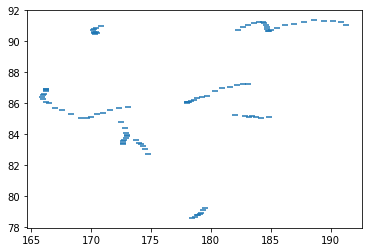

In [70]:
plt.scatter(p1v1[:100]['eye theta'], p1v1[:100]['eye phi'], marker = '_')

In [82]:
v[:10]

array([  7.4393099 ,   5.01844752,   2.38155279,   3.53150345,
         4.09841009,   4.72341973,   5.62035129, 145.21544328,
         9.6372481 ,   6.31061578])

In [83]:
acc[:10]

array([  60.52155942,   65.92236841,   28.74876657,   14.17266601,
         15.62524095,   22.42328913, 3489.87729961, 3389.45487954,
         83.16580804,   39.38700029])

In [79]:
np.where((v[1:] > 100).astype(int) + (acc[0:] > 2500).astype(int) >= 1)[0]

array([   6,    7,   12,   13,   22,   23,   44,   45,   51,   52,   72,
         73,   82,   83,  126,  127,  145,  146,  153,  154,  164,  165,
        220,  221,  229,  230,  234,  238,  239,  244,  245,  246,  252,
        253,  254,  260,  261,  269,  270,  277,  278,  283,  284,  290,
        291,  298,  299,  306,  307,  345,  346,  355,  356,  362,  363,
        369,  370,  393,  394,  395,  407,  408,  415,  416,  423,  431,
        432,  433,  438,  439,  443,  444,  454,  455,  461,  470,  471,
        476,  477,  478,  479,  480,  483,  484,  485,  525,  541,  542,
        543,  549,  552,  553,  561,  562,  565,  566,  589,  590,  591,
        592,  593,  594,  595,  596,  597,  598,  605,  606,  624,  625,
        626,  627,  628,  629,  631,  635,  636,  655,  656,  657,  674,
        675,  687,  688,  699,  700,  706,  707,  715,  716,  717,  749,
        750,  753,  754,  755,  787,  788,  799,  800,  805,  806,  829,
        837,  838,  839,  862,  863,  873,  874,  9

In [72]:
for i in (1, 1476):
    if v[i]<100 and acc[i]>2500:
        print("Yes")
    elif v[i]>100 and acc[i]<2500:
        print("Yes22")

In [113]:
# Segmenting frames
# Assuming 25fps

def segment_main_sequence(df, ang_disp, ang_vel, ang_acc):
    
    # FUNCTION FOR SACCADES
    def get_saccades(df, ang_disp, ang_vel, ang_acc, maxvel = 80, maxacc = 2000):

        sacstarts = np.where((ang_vel[1:] > maxvel).astype(int) + (ang_acc[0:] > maxacc).astype(int) >= 1)[0]
        print(sacstarts)
        saccades = []
        i=0
        while True:
            if i >= len(sacstarts):
                break
            pair = []
            pair.append(sacstarts[i])
            stop = False
            j = i+1
            while not stop:
                if j == len(sacstarts):
                    break
                if sacstarts[j]-sacstarts[i]==j-i:
                    j = j+1
                    i = i+1
                else:
                    stop = True

            pair.append(sacstarts[i]+1)
            saccades.append(pair)
            i=j

        df_saccades = pd.DataFrame(columns = ["Start of Saccade", "End of Saccade", "Amplitude", "Peak Vel", "Peak Acc", "Index"])
        for ind in saccades:
            starting_coord = [p1v1.loc[ind[0]+1]["eye theta"], p1v1.loc[ind[0]+1]["eye phi"]]
            ending_coord = [p1v1.loc[ind[1]+1]["eye theta"], p1v1.loc[ind[1]+1]["eye phi"]]
            peak_vel = max(element for element in ang_vel[ind[0]:ind[1]+1])
            peak_acc = max(element for element in ang_acc[ind[0]:ind[1]])
            amplitude = angular_disp(p1v1.loc[ind[1]+1]["eye theta"], p1v1.loc[ind[1]+1]["eye phi"], p1v1.loc[ind[0]+1]["eye theta"], p1v1.loc[ind[0]+1]["eye phi"])


            index = [ind[0]+1, ind[1]+1]

            df_saccades.loc[len(df_saccades.index)] = [starting_coord, ending_coord, amplitude, peak_vel, peak_acc, index] 

        return df_saccades
    
    
    #FUNCTION FOR FIXATIONS
    def get_fixation(df, ang_disp, maxdist = 0.25, mindur = 7):
        
        Sfix = []
        fixstart = False
        i=0
        while True:
            if i >= len(ang_disp):
                break
        
            current_ang_disp = ang_disp[i]
            
            if current_ang_disp <= maxdist and not fixstart:
                # start a new fixation
                fixstart = True
                Sfix.append([i])
            elif current_ang_disp > maxdist and fixstart:
                # end the current fixation
                fixstart = False
                
                # only store the fixation if the duration is ok
                if i-Sfix[-1][0] >= mindur:
                    Sfix[-1].append(i-1)
                
                # delete the last fixation start if it was too short
                else:
                    Sfix.pop(-1)

#             print(current_ang_disp)
#             print(fixstart)
#             print(i)
#             print("-----")
            i += 1
        
        df_fixations = pd.DataFrame(columns = ["Start of Fixation", "End of Fixation", "Total Ang Displacement during Fixation", "Index"])
        for ind in Sfix:
            starting_coord = [p1v1.loc[ind[0]+1]["eye theta"], p1v1.loc[ind[0]+1]["eye phi"]]
            ending_coord = [p1v1.loc[ind[1]+1]["eye theta"], p1v1.loc[ind[1]+1]["eye phi"]]
            total_ang_disp = angular_disp(starting_coord[0], starting_coord[1], ending_coord[0], ending_coord[1])

            index = [ind[0], ind[1]+1]

            df_fixations.loc[len(df_fixations.index)] = [starting_coord, ending_coord, total_ang_disp, index] 
        
        return df_fixations
    
#     #FUNCTION FOR SMOOTH PURSUIT
#     def get_smoothPursuit():
        
    
    
    df_fixs = get_fixation(df, ang_disp)
    df_sacc = get_saccades(df, ang_disp, ang_vel, ang_acc)
    
    return df_sacc, df_fixs

In [114]:
sac, fix = segment_main_sequence(p1v1, angle, v, acc)

[   6    7   12   13   22   23   44   45   51   52   72   73   82   83
  126  127  145  146  153  154  164  165  220  221  229  230  234  235
  237  238  239  240  244  245  246  252  253  254  259  260  261  266
  269  270  273  277  278  279  283  284  289  290  291  298  299  306
  307  318  345  346  355  356  362  363  369  370  393  394  395  407
  408  412  415  416  423  431  432  433  438  439  443  444  454  455
  461  462  470  471  474  475  476  477  478  479  480  481  483  484
  485  486  525  541  542  543  544  549  550  552  553  561  562  565
  566  589  590  591  592  593  594  595  596  597  598  599  600  604
  605  606  624  625  626  627  628  629  631  632  634  635  636  655
  656  657  671  674  675  687  688  694  699  700  706  707  715  716
  717  738  739  749  750  753  754  755  787  788  799  800  805  806
  829  830  837  838  839  862  863  873  874  880  881  912  913  927
  928  952  953  968  969  989  990  994  995 1006 1014 1015 1024 1025
 1046 

In [77]:
print(acc[6])
print(v[7])
print(angle[7])
print("-------")
print(p1v1.loc[7]["eye theta"], p1v1.loc[7]["eye phi"])
print(p1v1.loc[8]["eye theta"], p1v1.loc[8]["eye phi"])

3489.8772996109983
145.2154432786871
5.808617731147485
-------
179.47868400000002 79.269948
174.7818 82.76630399999999


In [78]:
for i in range(len(sac)):
    if sac["Index"][i][0]-sac["Index"][i][1] > 2:
        print(sac["Index"][i][0]-sac["Index"][i][1])

In [84]:
sac[:20]

,Start of Saccade,End of Saccade,Amplitude,Peak Vel,Peak Acc,Index
0,"[179.47868400000002, 79.269948]","[174.527388, 83.057616]",5.808618,145.215443,3489.877300,"[7, 9]"
1,"[173.727756, 83.64031200000001]","[170.44430400000002, 90.627714]",7.628741,190.718523,4705.048857,"[13, 15]"
2,"[170.87443199999998, 91.01764800000001]","[182.706948, 90.949914]",11.361835,284.045869,6795.293962,"[23, 25]"
3,"[191.31472800000003, 91.08863999999998]","[184.175568, 85.06387799999999]",8.790090,219.752246,5205.903212,"[45, 47]"
4,"[182.021292, 85.23982799999999]","[172.377108, 85.675806]",8.925567,223.139182,5131.117079,"[52, 54]"
5,"[166.228092, 86.93415]","[172.80604799999998, 84.43555200000002]",6.568013,164.200327,4095.076876,"[73, 75]"
6,"[172.65538800000002, 83.41390799999999]","[178.04660400000003, 86.072058]",5.990752,149.768789,3735.058859,"[83, 85]"
7,"[188.786988, 89.41455]","[195.964236, 90.051174]",6.768131,169.203281,4195.420100,"[127, 129]"
8,"[204.55164, 91.21123800000001]","[197.404632, 88.06255200000001]",8.347587,208.689687,5021.474457,"[146, 148]"
9,"[195.342156, 88.65999000000001]","[189.89870399999998, 86.28294600000001]",5.835880,145.896991,3585.166711,"[154, 156]"


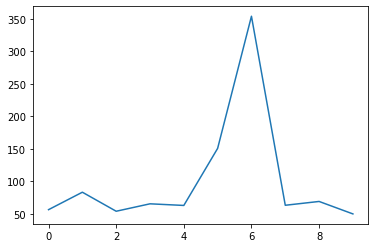

In [86]:
plt.plot(v[240:250])

In [87]:
p1v1

,frame,frame index,forward,head position x,head position y,eye,gaze position x,gaze position y,head theta,head phi,eye theta,eye phi,shifted theta,shifted phi,theta eye_in_head,phi eye_in_head
0,frame,1,forward,0.500627,0.527950,eye,0.495522,0.436755,180.225576,95.030982,178.387992,78.615846,178.613568,83.646828,0.167963,16.412495
1,frame,2,forward,0.501349,0.528238,eye,0.496338,0.437171,180.485496,95.082858,178.681716,78.690780,179.167212,83.773638,0.166550,16.389507
2,frame,3,forward,0.501704,0.528531,eye,0.496785,0.437861,180.613548,95.135508,178.842492,78.814998,179.456040,83.950506,0.165158,16.318006
3,frame,4,forward,0.501793,0.528431,eye,0.497054,0.437900,180.645408,95.117616,178.939332,78.822036,179.584740,83.939652,0.158527,16.293264
4,frame,5,forward,0.502112,0.528415,eye,0.497443,0.438079,180.760212,95.114628,179.079516,78.854274,179.839728,83.968902,0.156051,16.258108
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1474,frame,1475,forward,0.636678,0.578426,eye,0.623715,0.494168,229.204188,104.116734,224.537400,88.950276,273.741588,103.067010,1.177809,15.118471
1475,frame,1476,forward,0.636233,0.579449,eye,0.623237,0.495560,229.043880,104.300802,224.365176,89.200782,273.409056,103.501584,1.195511,15.051184
1476,frame,1477,forward,0.635597,0.580375,eye,0.622583,0.496684,228.814776,104.467554,224.129952,89.403174,272.944728,103.870728,1.210530,15.014863
1477,frame,1478,forward,0.634922,0.581205,eye,0.621824,0.497603,228.571740,104.616846,223.856568,89.568468,272.428308,104.185314,1.230558,14.997714


In [147]:
# Segmenting frames
# Assuming 25fps

def angular_disp(theta_new, phi_new, theta_old, phi_old):
    tn = 180 - theta_new
    to = 180 - theta_old
    pn = phi_new - 90
    po = phi_old - 90
    
    v1 = [math.cos(pn*(math.pi/180))*math.cos(tn*(math.pi/180)), math.cos(pn*(math.pi/180))*math.sin(tn*(math.pi/180)), math.sin(pn*(math.pi/180))]
    v2 = [math.cos(po*(math.pi/180))*math.cos(to*(math.pi/180)), math.cos(po*(math.pi/180))*math.sin(to*(math.pi/180)), math.sin(po*(math.pi/180))]

    dotPro = np.dot(v1, v2)
    mag_v1 = math.sqrt(sum(pow(element, 2) for element in v1))
    mag_v2 = math.sqrt(sum(pow(element, 2) for element in v2))
    # time is constant in every jump

    ang_disp = (math.degrees(math.acos(dotPro))/(mag_v1*mag_v2))
    
    return ang_disp

def angular_metrics_e_w(df):
    ang_vel = []
    ang_disp = []
    for i in range(1, len(df)):
        
        print(i)
        
        print(df['head theta'][i])
        print(df['head phi'][i])
        print(df['head theta'][i-1])
        print(df['head phi'][i-1])
        
        disp = angular_disp(df['head theta'][i], df['head phi'][i], df['head theta'][i-1], df['head phi'][i-1])
        print("---------")
        
        disp = abs(disp)
        print(disp)
        print(disp*25)
        print("-----")
        ang_disp.append(disp)
        ang_vel.append(disp*25)
        
    ang_acc = np.diff(ang_vel)
    #Taking absolute value
    ang_accel = np.array([abs(ele) for ele in ang_acc])
    
    ang_accel = ang_accel*25
    ang_vel = np.array(ang_vel)
    
    return ang_disp, ang_vel, ang_accel

def segment_main_sequence(df, ang_disp, ang_vel, ang_acc):
    
    # FUNCTION FOR SACCADES
    def get_saccades(df, ang_disp, ang_vel, ang_acc, maxvel = 30, maxacc = 800):

        sacstarts = np.where((ang_vel[1:] > maxvel).astype(int) + (ang_acc[0:] > maxacc).astype(int) >= 1)[0]
        print(sacstarts)
        saccades = []
        i=0
        while True:
            if i >= len(sacstarts):
                break
            pair = []
            pair.append(sacstarts[i])
            stop = False
            j = i+1
            while not stop:
                if j == len(sacstarts):
                    break
                if sacstarts[j]-sacstarts[i]==j-i:
                    j = j+1
                    i = i+1
                else:
                    stop = True

            pair.append(sacstarts[i]+1)
            saccades.append(pair)
            i=j

        df_saccades = pd.DataFrame(columns = ["Start of Saccade", "End of Saccade", "Amplitude", "Peak Vel", "Peak Acc", "Index"])
        for ind in saccades:
            starting_coord = [p1v1.loc[ind[0]+1]["head theta"], p1v1.loc[ind[0]+1]["head phi"]]
            ending_coord = [p1v1.loc[ind[1]+1]["head theta"], p1v1.loc[ind[1]+1]["head phi"]]
            peak_vel = max(element for element in ang_vel[ind[0]:ind[1]+1])
            peak_acc = max(element for element in ang_acc[ind[0]:ind[1]])
            amplitude = angular_disp(p1v1.loc[ind[1]+1]["head theta"], p1v1.loc[ind[1]+1]["head phi"], p1v1.loc[ind[0]+1]["head theta"], p1v1.loc[ind[0]+1]["head phi"])

            index = [ind[0]+1, ind[1]+1]

            df_saccades.loc[len(df_saccades.index)] = [starting_coord, ending_coord, amplitude, peak_vel, peak_acc, index] 

        return df_saccades
    
    
    #FUNCTION FOR FIXATIONS
    def get_fixation(df, ang_disp, maxdist = 0.25, mindur = 7):
        
        Sfix = []
        fixstart = False
        i=0
        while True:
            if i >= len(ang_disp):
                break
        
            current_ang_disp = ang_disp[i]
            
            if current_ang_disp <= maxdist and not fixstart:
                # start a new fixation
                fixstart = True
                Sfix.append([i])
            elif current_ang_disp > maxdist and fixstart:
                # end the current fixation
                fixstart = False
                
                # only store the fixation if the duration is ok
                if i-Sfix[-1][0] >= mindur:
                    Sfix[-1].append(i-1)
                
                # delete the last fixation start if it was too short
                else:
                    Sfix.pop(-1)

#             print(current_ang_disp)
#             print(fixstart)
#             print(i)
#             print("-----")
            i += 1
        
        df_fixations = pd.DataFrame(columns = ["Start of Fixation", "End of Fixation", "Total Ang Displacement during Fixation", "Index"])
        for ind in Sfix:
            starting_coord = [p1v1.loc[ind[0]+1]["head theta"], p1v1.loc[ind[0]+1]["head phi"]]
            ending_coord = [p1v1.loc[ind[1]+1]["head theta"], p1v1.loc[ind[1]+1]["head phi"]]
            total_ang_disp = angular_disp(starting_coord[0], starting_coord[1], ending_coord[0], ending_coord[1])

            index = [ind[0], ind[1]+1]

            df_fixations.loc[len(df_fixations.index)] = [starting_coord, ending_coord, total_ang_disp, index] 
        
        return df_fixations
    
#     #FUNCTION FOR SMOOTH PURSUIT
#     def get_smoothPursuit():
        
    
    
    df_fixs = get_fixation(df, ang_disp)
    df_sacc = get_saccades(df, ang_disp, ang_vel, ang_acc)
    
    return df_sacc, df_fixs

In [148]:
disp_head, v_head, acc_head = angular_metrics_e_w(p1v1)

1
180.485496
95.08285799999999
180.22557599999996
95.030982
---------
0.26405419536664726
6.601354884166182
-----
2
180.613548
95.13550799999999
180.485496
95.08285799999999
---------
0.13798295321918996
3.449573830479749
-----
3
180.645408
95.117616
180.613548
95.13550799999999
---------
0.03642908877369393
0.9107272193423481
-----
4
180.76021200000002
95.114628
180.645408
95.117616
---------
0.1143856553192263
2.8596413829806577
-----
5
180.88444800000002
95.21562599999999
180.76021200000002
95.114628
---------
0.15971875923056836
3.992968980764209
-----
6
181.012428
95.369562
180.88444800000002
95.21562599999999
---------
0.19983943969794868
4.995985992448717
-----
7
181.152036
95.46748199999999
181.012428
95.369562
---------
0.1700144649629024
4.25036162407256
-----
8
181.22302800000003
95.54724
181.152036
95.46748199999999
---------
0.10655880965642031
2.663970241410508
-----
9
181.25020800000001
95.63074200000001
181.22302800000003
95.54724
---------
0.08777430776094476
2.1943576

13.285787762609441
-----
105
184.79700000000003
101.887308
184.302828
101.76789600000001
---------
0.4982022915619976
12.45505728904994
-----
106
185.27788800000002
101.97554400000001
184.79700000000003
101.887308
---------
0.4787009281318585
11.967523203296462
-----
107
185.74614
102.048948
185.27788800000002
101.97554400000001
---------
0.46384363829524494
11.596090957381124
-----
108
186.211296
102.14668800000001
185.74614
102.048948
---------
0.4652087624155978
11.630219060389944
-----
109
186.67854000000003
102.24882000000001
186.211296
102.14668800000001
---------
0.46797615946283927
11.699403986570982
-----
110
187.15489200000002
102.34236600000001
186.67854000000003
102.24882000000001
---------
0.4747331479030918
11.868328697577295
-----
111
187.60705199999998
102.41857799999998
187.15489200000002
102.34236600000001
---------
0.4481725962029244
11.20431490507311
-----
112
188.02940400000003
102.53498400000002
187.60705199999998
102.41857799999998
---------
0.4284921520941604
10

2.2544377181823805
56.36094295455951
-----
237
168.207516
93.78441
170.820648
94.360122
---------
2.669345001782692
66.7336250445673
-----
238
165.29256
93.476322
168.207516
93.78441
---------
2.925370300180331
73.13425750450827
-----
239
162.14968799999997
93.38205599999999
165.29256
93.476322
---------
3.138658780261236
78.4664695065309
-----
240
158.850396
93.20995800000001
162.14968799999997
93.38205599999999
---------
3.29832451433443
82.45811285836075
-----
241
155.38104
93.098214
158.850396
93.20995800000001
---------
3.465900216242746
86.64750540606865
-----
242
151.83594
93.101076
155.38104
93.098214
---------
3.539913042705325
88.49782606763313
-----
243
148.146804
92.94467399999999
151.83594
93.101076
---------
3.6873183478201077
92.18295869550269
-----
244
144.25966799999998
92.594592
148.146804
92.94467399999999
---------
3.898338571614094
97.45846429035235
-----
245
140.36148
92.397672
144.25966799999998
92.594592
---------
3.8994612392213512
97.48653098053379
-----
246
1

92.895192
---------
1.1891293260843085
29.728233152107713
-----
314
356.50648800000005
93.18204
357.737904
93.09229199999999
---------
1.2328414415841116
30.821036039602788
-----
315
355.045176
93.306708
356.50648800000005
93.18204
---------
1.4642861521542525
36.60715380385631
-----
316
353.47841999999997
93.36618
355.045176
93.306708
---------
1.565230360402168
39.1307590100542
-----
317
352.034964
93.555432
353.47841999999997
93.36618
---------
1.4531987741565278
36.32996935391319
-----
318
350.715528
93.89781
352.034964
93.555432
---------
1.360431574769091
34.010789369227275
-----
319
349.557156
94.180032
350.715528
93.89781
---------
1.1894600601851615
29.736501504629036
-----
320
348.529248
94.49411400000001
349.557156
94.180032
---------
1.0720060062403103
26.800150156007756
-----
321
347.623812
94.83305400000002
348.529248
94.49411400000001
---------
0.9639879394197137
24.099698485492844
-----
322
346.894092
95.13912599999999
347.623812
94.83305400000002
---------
0.7887633081

-----
404
9.296874
99.596124
7.3771524
99.09072
---------
1.9605081039809182
49.01270259952295
-----
405
11.430558000000001
100.02356999999999
9.296874
99.596124
---------
2.1454889640271135
53.63722410067784
-----
406
13.694050800000001
100.34420400000002
11.430558000000001
100.02356999999999
---------
2.250779545901644
56.2694886475411
-----
407
16.0215552
100.724706
13.694050800000001
100.34420400000002
---------
2.319684742015106
57.99211855037765
-----
408
18.4169448
101.119446
16.0215552
100.724706
---------
2.384882734303314
59.62206835758285
-----
409
20.774466
101.44036799999999
18.4169448
101.119446
---------
2.33413920520569
58.35348013014225
-----
410
23.140771200000003
101.76435
20.774466
101.44036799999999
---------
2.340476443395074
58.51191108487686
-----
411
25.362961199999997
102.17867400000002
23.140771200000003
101.76435
---------
2.2129798088389117
55.32449522097279
-----
412
27.4932072
102.37618799999998
25.362961199999997
102.17867400000002
---------
2.0908694090

4.190480340486168
104.76200851215421
-----
484
142.31458800000001
94.38186599999999
138.306924
94.50050399999999
---------
3.997385676478197
99.93464191195493
-----
485
146.170656
94.34303999999999
142.31458800000001
94.38186599999999
---------
3.8450880057035186
96.12720014258797
-----
486
149.97618
94.349772
146.170656
94.34303999999999
---------
3.794581572839195
94.86453932097987
-----
487
153.736704
94.38366599999999
149.97618
94.349772
---------
3.749756980480861
93.74392451202152
-----
488
157.32882
94.47587999999999
153.736704
94.38366599999999
---------
3.5825685371365052
89.56421342841263
-----
489
160.714764
94.59878400000001
157.32882
94.47587999999999
---------
3.3775655969542573
84.43913992385643
-----
490
163.91527200000002
94.74075
160.714764
94.59878400000001
---------
3.193037825133656
79.8259456283414
-----
491
166.82868000000002
94.90012200000001
163.91527200000002
94.74075
---------
2.9074712109893883
72.6867802747347
-----
492
169.34824799999998
95.09588999999998


---------
1.424155168794763
35.60387921986907
-----
565
273.022056
98.348058
272.075616
98.03836799999999
---------
0.9866415836241127
24.666039590602818
-----
566
273.459744
98.571438
273.022056
98.348058
---------
0.4871581149202556
12.178952873006391
-----
567
273.426516
98.68411800000001
273.459744
98.571438
---------
0.11737135465265038
2.9342838663162594
-----
568
273.154824
98.790282
273.426516
98.68411800000001
---------
0.2887629487331724
7.21907371832931
-----
569
272.86171199999995
99.145278
273.154824
98.790282
---------
0.45809271421607944
11.452317855401986
-----
570
272.54566800000003
99.58964400000002
272.86171199999995
99.145278
---------
0.5428611523162494
13.571528807906235
-----
571
272.129364
99.99765000000001
272.54566800000003
99.58964400000002
---------
0.5785867104224323
14.464667760560806
-----
572
271.701792
100.41778799999999
272.129364
99.99765000000001
---------
0.5946354216422721
14.865885541056803
-----
573
271.233468
100.91005200000002
271.701792
100.41

1.3418808539462066
33.547021348655164
-----
712
187.54668000000004
94.24035
186.457212
94.360014
---------
1.0929711992471958
27.324279981179895
-----
713
188.31672000000003
94.211946
187.54668000000004
94.24035
---------
0.7684712925360232
19.21178231340058
-----
714
188.363952
94.34952000000001
188.31672000000003
94.211946
---------
0.145413330422649
3.635333260566225
-----
715
187.75015199999999
94.393746
188.363952
94.34952000000001
---------
0.6136100577829317
15.34025144457329
-----
716
186.50016000000002
94.14818999999999
187.75015199999999
94.393746
---------
1.270475901787375
31.761897544684377
-----
717
184.811508
93.88857600000001
186.50016000000002
94.14818999999999
---------
1.7043872586825868
42.60968146706467
-----
718
182.599092
93.98255400000001
184.811508
93.88857600000001
---------
2.2091977236256133
55.22994309064033
-----
719
180.08766000000003
94.301136
182.599092
93.98255400000001
---------
2.5250467399598304
63.12616849899576
-----
720
177.635988
94.741308
180.0

206.99179199999998
105.29594999999999
207.018648
105.23197799999998
---------
0.06901936367960239
1.7254840919900598
-----
801
206.899128
105.409872
206.99179199999998
105.29594999999999
---------
0.14478575710332067
3.619643927583017
-----
802
206.82122400000003
105.49362599999999
206.899128
105.409872
---------
0.11248539856493099
2.812134964123275
-----
803
206.77042800000004
105.42551400000002
206.82122400000003
105.49362599999999
---------
0.08388172368591561
2.09704309214789
-----
804
206.841024
105.25264200000002
206.77042800000004
105.42551400000002
---------
0.18579496855039848
4.644874213759962
-----
805
207.078696
105.105186
206.841024
105.25264200000002
---------
0.27268766301682323
6.817191575420581
-----
806
207.44272800000002
104.95403999999999
207.078696
105.105186
---------
0.38269166304167557
9.567291576041889
-----
807
207.97527599999998
104.93874
207.44272800000002
104.95403999999999
---------
0.5147579125252426
12.868947813131065
-----
808
208.60703999999998
105.02

-----
899
213.494256
103.73652
213.63919199999998
103.789584
---------
0.1504435743149332
3.7610893578733298
-----
900
213.355116
103.70251800000001
213.494256
103.73652
---------
0.13938110920035834
3.4845277300089585
-----
901
213.223428
103.65894
213.355116
103.70251800000001
---------
0.13516920867941218
3.3792302169853046
-----
902
213.07514399999997
103.62385799999998
213.223428
103.65894
---------
0.14830999031736486
3.7077497579341214
-----
903
212.97751199999996
103.611024
213.07514399999997
103.62385799999998
---------
0.09575150000344788
2.393787500086197
-----
904
212.91227999999998
103.645134
212.97751199999996
103.611024
---------
0.07198939609934141
1.7997349024835352
-----
905
212.82069599999997
103.713336
212.91227999999998
103.645134
---------
0.11211626619545684
2.8029066548864208
-----
906
212.75978400000002
103.67861400000002
212.82069599999997
103.713336
---------
0.06861407371486035
1.7153518428715087
-----
907
212.725044
103.602852
212.75978400000002
103.6786140

-----
1040
266.491872
103.71209400000001
266.093064
103.67893799999999
---------
0.388884906293955
9.722122657348875
-----
1041
266.821776
103.73574599999999
266.491872
103.71209400000001
---------
0.3213568463703503
8.033921159258757
-----
1042
267.089148
103.68864
266.821776
103.73574599999999
---------
0.2639883167799096
6.59970791949774
-----
1043
267.293052
103.61808
267.089148
103.68864
---------
0.21033058847536865
5.258264711884216
-----
1044
267.51106799999997
103.55860799999999
267.293052
103.61808
---------
0.22010050340288945
5.502512585072236
-----
1045
267.756048
103.50372599999999
267.51106799999997
103.55860799999999
---------
0.24442126530981892
6.110531632745473
-----
1046
268.011684
103.44452400000002
267.756048
103.50372599999999
---------
0.25555169083229795
6.388792270807449
-----
1047
268.367076
103.47566400000001
268.011684
103.44452400000002
---------
0.3470301202512142
8.675753006280356
-----
1048
268.916256
103.56102000000001
268.367076
103.47566400000001
---

-----
1165
308.015928
98.217108
309.40653599999996
98.22227400000001
---------
1.3763315034327044
34.40828758581761
-----
1166
306.649404
98.244162
308.015928
98.217108
---------
1.3527184612816237
33.81796153204059
-----
1167
305.17416
98.25228000000001
306.649404
98.244162
---------
1.4600055803991594
36.500139509978986
-----
1168
303.5773080000001
98.166384
305.17416
98.25228000000001
---------
1.5828202441556314
39.570506103890786
-----
1169
301.8627
98.126208
303.5773080000001
98.166384
---------
1.6977808372103582
42.44452093025895
-----
1170
300.03919199999996
98.08155000000001
301.8627
98.126208
---------
1.80584937089825
45.14623427245625
-----
1171
298.233036
98.09622
300.03919199999996
98.08155000000001
---------
1.7882452081420488
44.70613020355122
-----
1172
296.50568400000003
98.124282
298.233036
98.09622
---------
1.710304696095525
42.75761740238813
-----
1173
294.83532
98.09335799999998
296.50568400000003
98.124282
---------
1.653951559486245
41.34878898715613
-----
117

97.2927
184.520628
97.136496
---------
1.048470688708904
26.2117672177226
-----
1262
182.52194400000002
97.464132
183.47558399999997
97.2927
---------
0.961154845753956
24.0288711438489
-----
1263
181.57316400000002
97.67359799999998
182.52194400000002
97.464132
---------
0.9635560783989208
24.08890195997302
-----
1264
180.638892
97.840512
181.57316400000002
97.67359799999998
---------
0.9406497198267618
23.516242995669046
-----
1265
179.72528400000002
97.92923400000002
180.638892
97.840512
---------
0.909308903938498
22.73272259846245
-----
1266
178.722468
97.96357799999998
179.72528400000002
97.92923400000002
---------
0.9937801427118863
24.844503567797158
-----
1267
177.55034400000002
97.996662
178.722468
97.96357799999998
---------
1.1612444728423927
29.031111821059817
-----
1268
176.24051999999998
97.98568200000001
177.55034400000002
97.996662
---------
1.2971508786910046
32.42877196727512
-----
1269
174.690864
97.94403000000001
176.24051999999998
97.98568200000001
---------
1.535

102.47526
217.97467199999997
102.360366
---------
0.12272559139020706
3.0681397847551763
-----
1348
217.98003599999998
102.52431
217.9305
102.47526
---------
0.06888228962260065
1.7220572405650163
-----
1349
218.09879999999998
102.56358599999999
217.98003599999998
102.52431
---------
0.12240160192346167
3.0600400480865417
-----
1350
218.33316000000002
102.514392
218.09879999999998
102.56358599999999
---------
0.23399963547175578
5.849990886793894
-----
1351
218.72923200000002
102.435084
218.33316000000002
102.514392
---------
0.3947696106159942
9.869240265399855
-----
1352
219.162888
102.386646
218.72923200000002
102.435084
---------
0.4262829815915011
10.657074539787526
-----
1353
219.604968
102.386304
219.162888
102.386646
---------
0.4317897637542243
10.794744093855607
-----
1354
219.99337199999997
102.41828999999998
219.604968
102.386304
---------
0.380686179753154
9.51715449382885
-----
1355
220.28813999999997
102.499866
219.99337199999997
102.41828999999998
---------
0.2991631777

4.504993513678457
-----
1417
230.30827199999996
100.17178200000001
230.029632
100.15911000000001
---------
0.27455855127750806
6.863963781937701
-----
1418
230.688864
100.16807399999999
230.30827199999996
100.17178200000001
---------
0.37463062626530225
9.365765656632556
-----
1419
231.15837599999998
100.197216
230.688864
100.16807399999999
---------
0.46303472994127975
11.575868248531993
-----
1420
231.69758399999998
100.21955400000002
231.15837599999998
100.197216
---------
0.5311420380555628
13.27855095138907
-----
1421
232.22041199999998
100.20358800000001
231.69758399999998
100.21955400000002
---------
0.5147939023422644
12.86984755855661
-----
1422
232.715664
100.21116599999999
232.22041199999998
100.20358800000001
---------
0.4874724047619394
12.186810119048486
-----
1423
233.192952
100.302192
232.715664
100.21116599999999
---------
0.4784004749359787
11.960011873399468
-----
1424
233.57732399999998
100.44833400000002
233.192952
100.302192
---------
0.40534843534725806
10.133710

In [122]:
sac_head, fix_head = segment_main_sequence(p1v1, disp_head, v_head, acc_head)

[ 220  221  222  223  224  225  226  227  228  229  230  231  232  233
  234  235  236  237  238  239  240  241  242  243  244  245  246  247
  248  249  250  251  252  253  254  255  256  257  258  259  260  261
  262  263  264  265  266  267  268  269  270  271  272  273  274  275
  276  277  278  279  280  281  282  283  284  285  286  287  288  289
  290  291  292  293  294  295  296  297  298  299  312  313  314  315
  316  394  395  396  397  398  399  400  401  402  403  404  405  406
  407  408  409  410  411  412  413  414  415  416  417  418  419  420
  421  422  423  424  425  426  427  428  429  430  431  432  433  434
  438  439  440  441  442  457  458  459  460  461  462  463  464  470
  471  472  473  474  475  476  477  478  479  480  481  482  483  484
  485  486  487  488  489  490  491  492  493  523  524  525  526  535
  536  537  538  539  540  541  542  543  544  545  546  547  548  549
  550  551  552  553  554  555  556  557  558  559  560  561  562  587
  588 

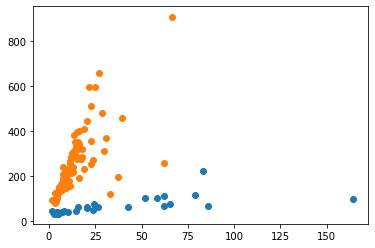

In [127]:
plt.scatter(x = sac_head["Amplitude"], y = sac_head["Peak Vel"])
plt.scatter(x = sac["Amplitude"], y = sac["Peak Vel"])
# plt.xlim(0, 15)
# plt.ylim(0, 100)

(0, 500)

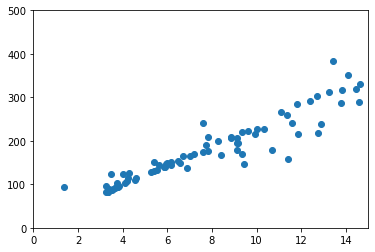

In [119]:
plt.scatter(x = sac["Amplitude"], y = sac["Peak Vel"])
plt.xlim(0, 15)
plt.ylim(0, 500)

In [123]:
sac_head

,Start of Saccade,End of Saccade,Amplitude,Peak Vel,Peak Acc,Index
0,"[197.45675999999997, 101.08733400000001]","[8.0413596, 91.727136]",164.128833,97.486531,443.205462,"[221, 301]"
1,"[357.737904, 93.09229199999999]","[350.715528, 93.89781]",7.055374,39.130759,144.652944,"[313, 318]"
2,"[356.258304, 96.35200200000001]","[83.64081600000002, 105.41583000000001]",85.804250,65.957539,273.691325,"[395, 436]"
3,"[85.841856, 107.373834]","[87.55722, 115.316946]",8.101831,46.134156,226.590882,"[439, 444]"
4,"[94.58712000000001, 115.73490599999998]","[93.816684, 99.88720200000002]",15.864528,62.634154,268.068943,"[458, 466]"
5,"[95.086512, 97.01380800000001]","[174.37975200000002, 95.86562400000001]",78.702355,118.256952,427.034544,"[471, 495]"
6,"[194.795676, 100.27062]","[199.920996, 100.002474]",5.052383,32.567149,46.608300,"[524, 528]"
7,"[206.038224, 100.291356]","[272.075616, 98.03836799999999]",65.123587,77.982647,258.245453,"[536, 564]"
8,"[265.800564, 101.9241]","[328.574088, 95.681916]",62.231927,112.171080,452.402173,"[588, 607]"
9,"[329.58669599999996, 95.744232]","[331.441956, 95.90983200000002]",1.853086,46.327161,527.239476,"[608, 609]"


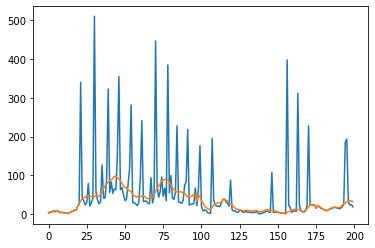

In [130]:
plt.plot(v[200:400])
plt.plot(v_head[200:400])

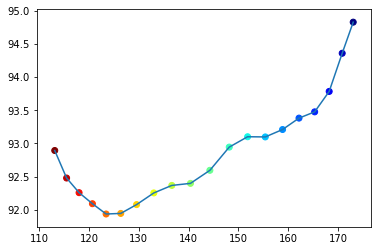

In [157]:
m = 235
n = 255

# plt.plot(p1v1[m:n]['eye theta'], p1v1[m:n]['eye phi'])
# plt.scatter(p1v1[m:n]['eye theta'], p1v1[m:n]['eye phi'], marker = 'o', cmap = "jet", c = p1v1[m:n]["frame index"])

plt.plot(p1v1[m:n]['head theta'], p1v1[m:n]['head phi'])
plt.scatter(p1v1[m:n]['head theta'], p1v1[m:n]['head phi'], marker = 'o', cmap = "jet", c = p1v1[m:n]["frame index"])

# plt.ylim(90, 100)
# plt.xlim(0, 100)

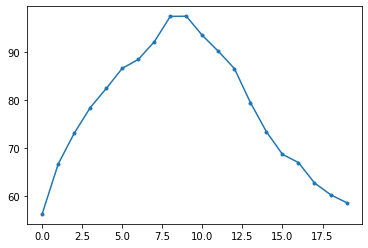

In [158]:
plt.plot(v_head[m:n], marker = '.')